## Keras - Basic Classification

#### Fashion MNIST

Source: [github](https://github.com/zalandoresearch/fashion-mnist)

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Explore

In [3]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


There are 60,000 images in the training set and 10,000 images in the test set, with each image represented as $28 \times 28$ pixels.

#### Preprocess

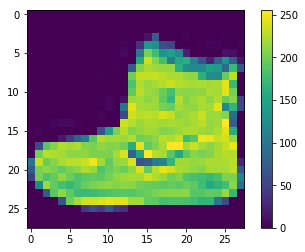

In [4]:
# Create a new figure
plt.figure()

# Display an image, usually in the format of ndarray
plt.imshow(train_images[0])

# Display the color bar on the side
plt.colorbar()

In [5]:
# The 3D matrix train_images has 60,000 2D arrays.
# Take advantage of ndarray's vectorized operations to scale each value to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

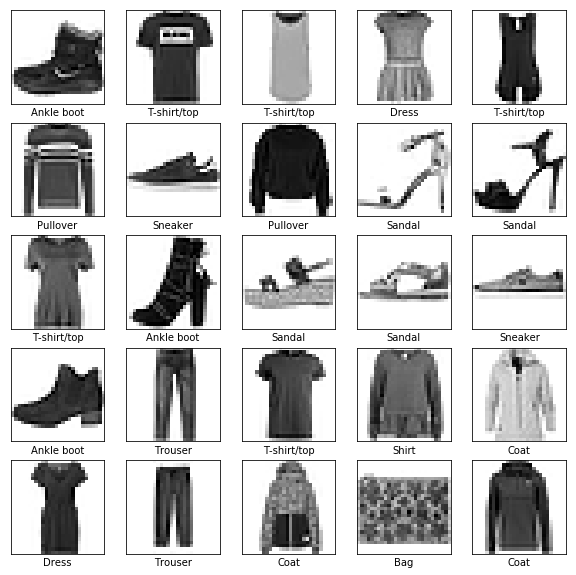

In [6]:
# Display some training data

# figsize: tuple of integers, (weight, height)
plt.figure(figsize=(10, 10))

for i in range(25):
    
    # plt.subplot(row, col, index): create a subplot to the current figure.
    plt.subplot(5, 5, i+1)
    
    # plt.xticks(ticks=None, labels=None): set the tick locations and labels of x-axis.
    # Pass an empty list to disable xticks on the subplots.
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    
    # Set label fo the x-axis
    plt.xlabel(class_names[train_labels[i]])

#### Setup the Layers

`keras.Sequential(layers=None, name=None)`
- Linear stack of layers.
- `layers`: list of layers to add to the model.
- Use `model.add(<Layer>)` to add a layer to the `model`.

`keras.layers.Flatten()`
- Flatten the input.
- Pass the shape of the input data.

`keras.layers.Dense(units, activation=None)`
- The regular densely-connected NN layer.
- Implements the operation `output = activation(dot(input, kernel) + bias)`
- You can configure which activation function to be used.
    - Tensorflow provides a list of common activation functions in `tf.nn` API.

In [7]:
model = keras.Sequential([
    
    # Transforms the format of the images from 2d (28 * 28) array to 1d (784 * 1) array.
    # No parameter to learn, just reformats the data.
    keras.layers.Flatten(input_shape=(28, 28)),
    
    # Fully connected NN layer of 128 nodes with ReLU activation. 
    # This is our hidden layer.
    keras.layers.Dense(128, activation=tf.nn.relu),
    
    # Fully connected NN layer of 10 nodes with softmax activation.
    # This is our output layer. 
    # Softmax indicates the most probable class.
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#### Compile the model

**Loss function**
- Measures how accurate the model is during training. 
- Our goal is to minimize the function by training parameters.
- If your target are *one-hot-encoded*, use `categorical_crossentropy`; if your targets are *integers*, use `sparse_categorical_crossentropy`. ([Source](https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/))

**Optimizer**
- Controls how the model is updated based on data and loss.
- Refer to [this list](https://keras.io/optimizers/) to see all built-in optimizers.

**Metrics**
- List of metrics to be evaluated by the model during training and testing.
- Typically use `accuracy`, the fraction of the images that are correctly classified.

In [8]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy', # see remark above
              metrics=['accuracy'])

#### Train the model

Procedure
1. Feed the training data to the model.
2. The model learns to associate the images and labels.
3. Use the trained model to make predictions about a test set.

In [9]:
# trains the model for a fixed epochs (iterations on a dataset).
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.4979 - acc: 0.8269
Epoch 2/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.3781 - acc: 0.8640
Epoch 3/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.3404 - acc: 0.8770
Epoch 4/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.3123 - acc: 0.8862
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2945 - acc: 0.8911
Epoch 6/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2800 - acc: 0.8957
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2671 - acc: 0.9001
Epoch 8/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.2577 - acc: 0.9035
Epoch 9/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.2501 - acc: 0.9062
Epoch 10/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2378 - acc: 0.9110

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test accuracy:", test_acc)

10000/10000 [==============================] - 0s 35us/step
Test accuracy: 0.8832


#### Make predictions

In [11]:
predictions = model.predict(test_images)
class_names[np.argmax(predictions[0])]

'Ankle boot'

The model predicts the first image in the test set to be an "Ankle boot".

In [12]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [13]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

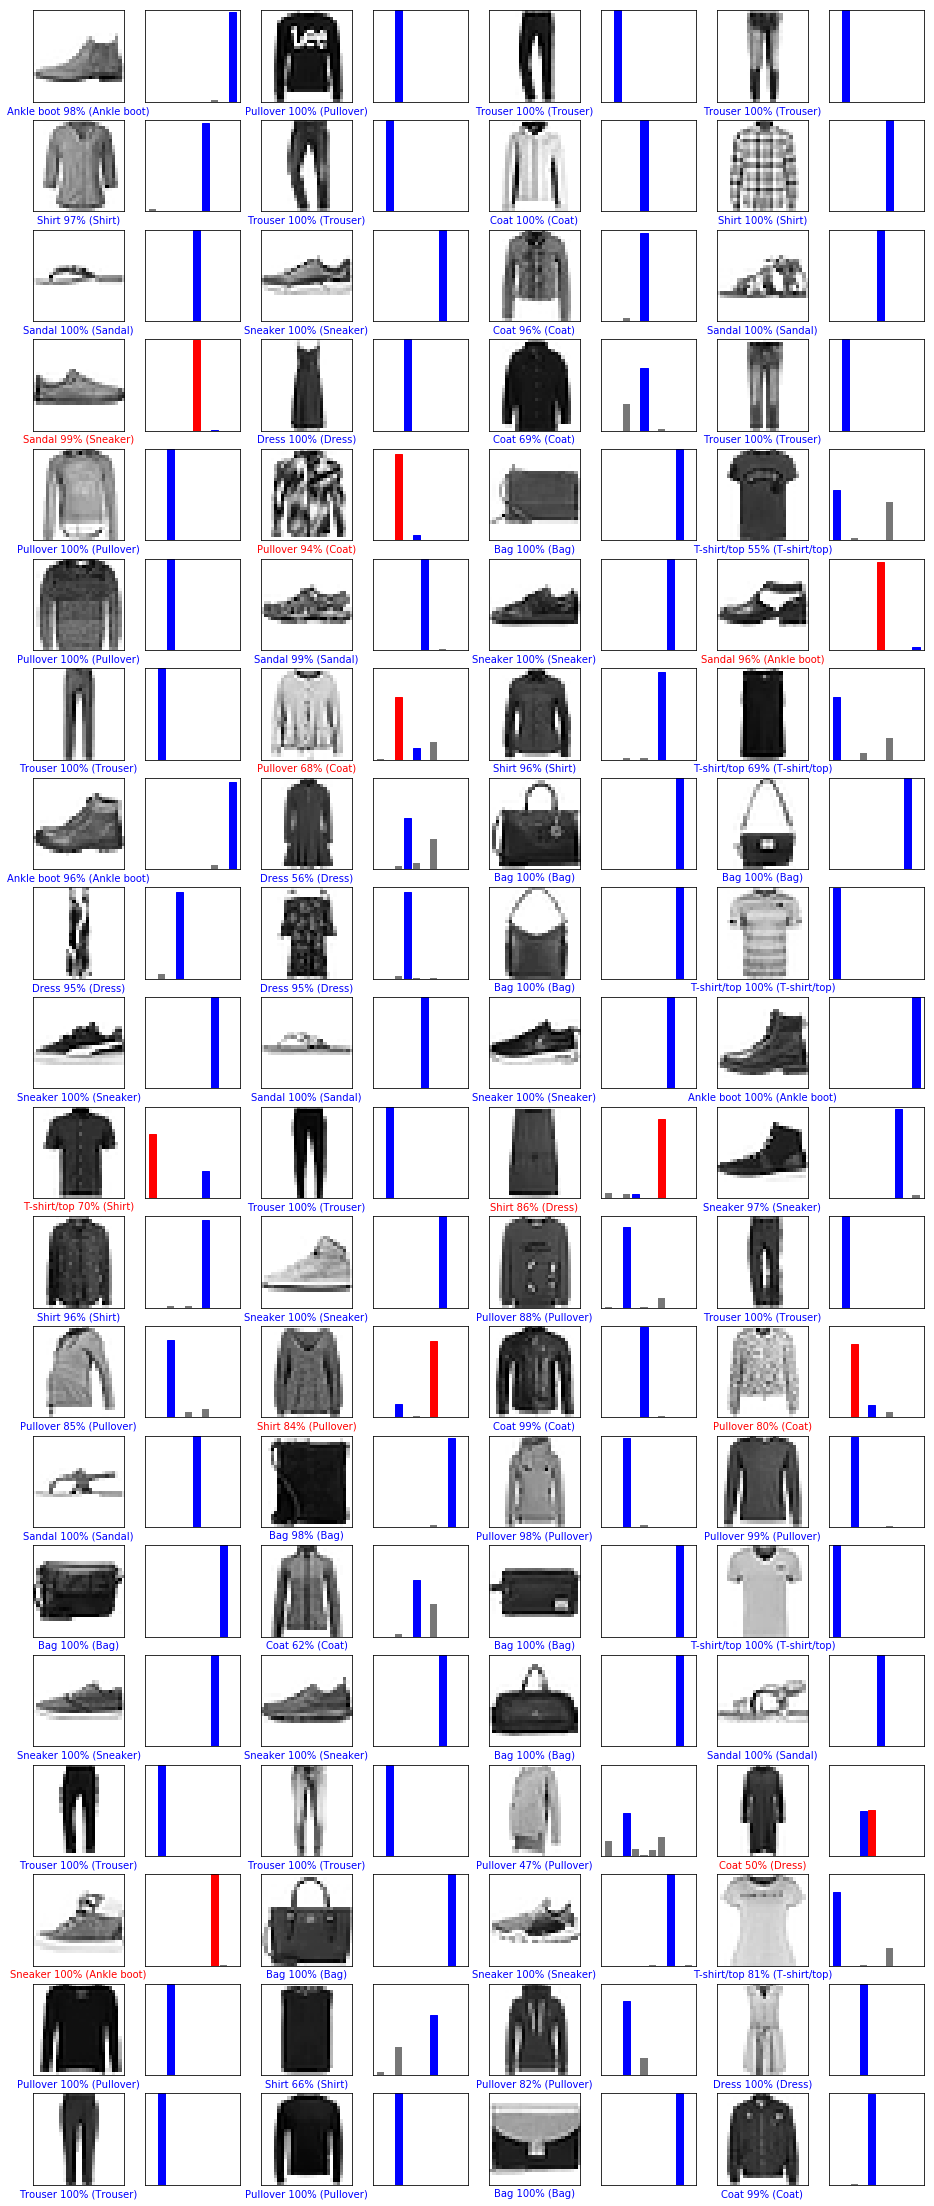

In [14]:
# Plot 80 samples along with their predicted labels.

num_rows = 20
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)